In [1]:
import numpy as np
import pandas as pd
import os
from os.path import join
import pickle
import sys
from keras.models import load_model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


In [2]:
thisPath = os.getcwd()
os.chdir("../../code")
projectDir = os.getcwd()


In [3]:
from evalUtils import plotModelHist, UrgentVRoutne, reportBinaryScores

In [4]:
yTestPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\224 x 224\targetData_(224, 224, 3)_test.csv"
yTrueTest = pd.read_csv(yTestPath, index_col=0)

In [5]:
yValPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\224 x 224\targetData_(224, 224, 3)_val.csv"
yTrueVal = pd.read_csv(yValPath, index_col=0)

In [6]:
yTrnPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\299x299\targetData_(299, 299, 3)_train.npy"
yTrueTrn = np.load(yTrnPath)

In [7]:
modelsPath = r"D:\Projects\OCT-Image-Classification\modelOutput\compareModels4"
InceptionPath = r"InceptionV3_dataAug_False2019-06-01_20_41_default"
ResNet50Path = r"ResNet50_dataAug_False2019-06-01_18_31_default" 
VGG16Path = r"VGG16_dataAug_False2019-06-05_15_46_default_224_noprep" 
XceptionPath = r"Xception_dataAug_False2019-06-02_10_52_default"

0 VGG16_dataAug_False2019-06-05_15_46_default_224_noprep VGG16


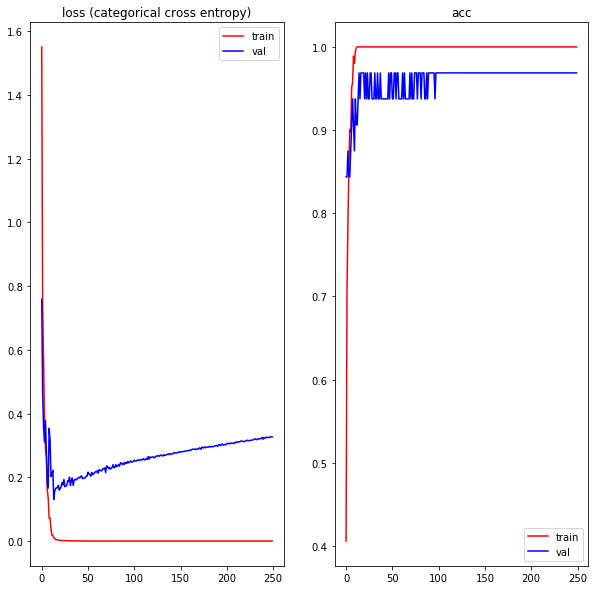

1 ResNet50_dataAug_False2019-06-01_18_31_default ResNet50


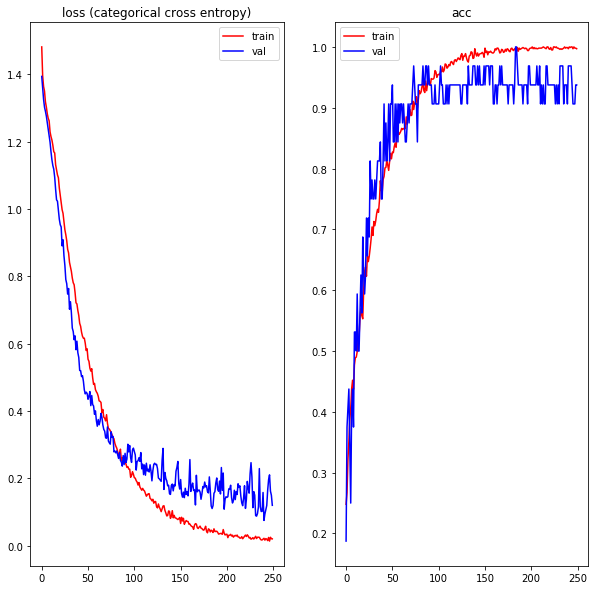

2 InceptionV3_dataAug_False2019-06-01_20_41_default InceptionV3


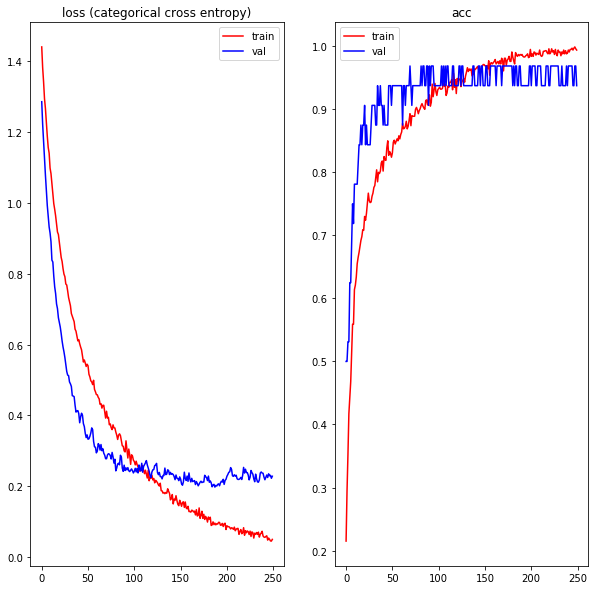

3 Xception_dataAug_False2019-06-02_10_52_default Xception


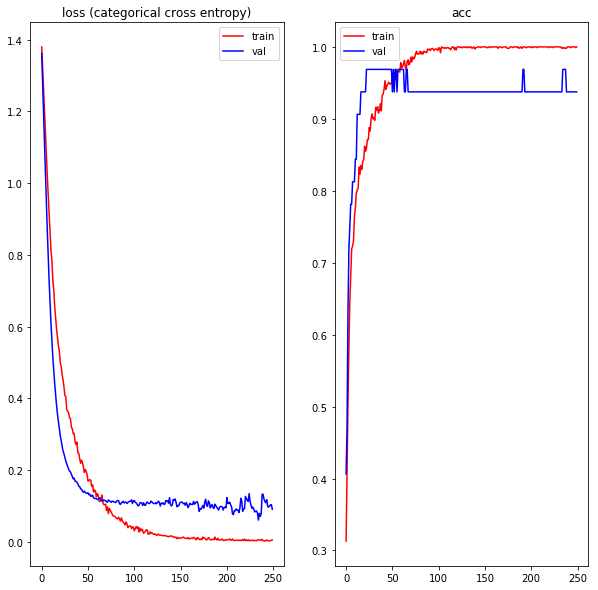

In [8]:
dirList = [VGG16Path, ResNet50Path, InceptionPath, XceptionPath] #
modelNames = ["VGG16", "ResNet50", "InceptionV3", "Xception"] #
yLblsUnique = np.unique(yTrueTest.values)
modelPred = {}
modelPredDF = pd.DataFrame(index=yTrueTest.index)
modelValPredDF = pd.DataFrame(index=yTrueVal.index)

modelTrnPredDF = pd.DataFrame(index=np.arange(len(yTrueTrn)))

for i, (expDir, modelName) in enumerate(zip(dirList, modelNames)):
    print(i, expDir, modelName)
    expPath = join(modelsPath, expDir)
    assert(os.path.isdir(expPath))
    histPath = join(expPath, "{}_History.csv".format(modelName)) 
    modelHist = pd.read_csv(histPath, index_col=0)
    plotModelHist(modelHist)
    
    yTestPredDF = pd.read_csv(join(expPath, "yPredDf__testSet_.csv"), index_col=0)
    modelPredDF.join(yTestPredDF)
    
    yValPredDf = pd.read_csv(join(expPath, "yPredDf__valSet_.csv"), index_col=0)
    modelValPredDF = modelValPredDF.join(yValPredDf.filter(regex='{}_'.format(modelName)))
    
    yTrnPredDf = pd.read_csv(join(expPath, "yPredDf__trainSet_.csv"), index_col=0)
    modelTrnPredDF = modelTrnPredDF.join(yTrnPredDf.filter(regex='{}_'.format(modelName)))
    '''
    if modelName == "VGG16":
        print('loading yTestPred')
        yTestPred = np.load(join(expPath, "yTestPred.npy"))
    else:
        print('loading yPred__testSet_')
    '''
    yTestPred = np.load(join(expPath, "yPred__testSet_.npy"))
    for yLbl in yLblsUnique:
        modelPredDF[modelName  +"_{}".format(yLbl)] = yTestPred[:, yLbl]
    modelPred[modelName] = yTestPred

modelPredDF['yTrueTest'] = yTrueTest
modelValPredDF['yTrueVal'] = yTrueVal
modelTrnPredDF['yTrueTrn'] = yTrueTrn
#modelPredDF['yTrueLbls'] = yTrueTest299


In [9]:
modelPredDF.to_csv(join(thisPath, 'modelPredictions.csv'))

In [10]:
modelValPredDF.to_csv(join(thisPath, 'modelPredictionsValData.csv'))
modelValPredDF.head()


,VGG16_0,VGG16_1,VGG16_2,VGG16_3,ResNet50_0,ResNet50_1,ResNet50_2,ResNet50_3,InceptionV3_0,InceptionV3_1,InceptionV3_2,InceptionV3_3,Xception_0,Xception_1,Xception_2,Xception_3,yTrueVal
CNV-6294785-1,7.432243e-10,0.000077,0.999920,0.000003,9.578714e-06,0.000155,0.998255,0.001580,0.000007,0.007567,0.992404,0.000022,0.000084,0.000404,0.999485,0.000027,2
CNV-6294785-2,1.029756e-07,0.927924,0.072033,0.000043,4.042411e-08,0.001835,0.997941,0.000224,0.000036,0.066854,0.932730,0.000380,0.000040,0.139526,0.859907,0.000527,2
CNV-6652117-1,4.829434e-10,0.000009,0.999978,0.000013,1.706148e-06,0.000034,0.997982,0.001983,0.000005,0.002666,0.997276,0.000052,0.000001,0.002957,0.997034,0.000008,2
CNV-6668596-1,1.430308e-05,0.007433,0.991674,0.000879,7.921449e-07,0.000654,0.999237,0.000108,0.000284,0.002832,0.995987,0.000897,0.000068,0.000024,0.999898,0.000010,2
CNV-6851127-1,6.353411e-07,0.055310,0.880071,0.064618,6.110703e-03,0.290553,0.697645,0.005692,0.000484,0.045665,0.950031,0.003820,0.000006,0.000045,0.999886,0.000063,2


In [11]:
modelTrnPredDF.to_csv(join(thisPath, 'modelPredictionsTrnData.csv'))
modelTrnPredDF.head()

,VGG16_0,VGG16_1,VGG16_2,VGG16_3,ResNet50_0,ResNet50_1,ResNet50_2,ResNet50_3,InceptionV3_0,InceptionV3_1,InceptionV3_2,InceptionV3_3,Xception_0,Xception_1,Xception_2,Xception_3,yTrueTrn
0,0.000002,4.412753e-05,9.994484e-01,0.000506,0.000018,0.000480,0.997727,0.001774,0.000309,0.004058,0.995385,0.000247,3.076761e-05,6.603231e-04,9.992272e-01,8.170836e-05,2
1,0.970868,1.066510e-04,5.446586e-07,0.029024,0.999923,0.000032,0.000012,0.000033,0.999513,0.000433,0.000018,0.000037,9.999995e-01,3.222754e-07,3.907170e-08,3.020718e-08,0
2,0.003738,2.306897e-03,3.705168e-05,0.993918,0.000144,0.000543,0.001944,0.997369,0.024414,0.017274,0.001849,0.956462,4.327701e-04,5.838766e-06,8.945180e-05,9.994720e-01,3
3,0.000002,1.773571e-08,8.329390e-05,0.999915,0.001061,0.000006,0.000217,0.998716,0.006067,0.002564,0.008567,0.982801,2.013233e-07,5.002639e-07,1.356113e-04,9.998636e-01,3
4,0.621012,3.755305e-01,2.319676e-03,0.001137,0.033750,0.942345,0.017840,0.006065,0.066308,0.903180,0.008877,0.021635,4.836215e-04,9.994430e-01,2.888534e-05,4.450330e-05,1


In [12]:
classMap = {
    "NORMAL": 0,
    "DRUSEN": 1,
    "CNV": 2,
    "DME": 3}


yTrue1Hot = to_categorical(yTrueTest)
yTrueTestUrgent = UrgentVRoutne(yTrue1Hot, classMap).astype(np.int)

In [13]:
AccList = []
SensList = []
SpecList = []

aucList = []
fprsList = []
tprsList = []

metricDict = {}
predLblsDF = pd.DataFrame(index=yTrueTest.index,
                          columns=modelPred.keys())
for model_i in modelPred.keys():
    print(model_i)


    
    yTestPred = modelPred[model_i]
    yTestPredLbls = yTestPred.argmax(axis=1)
    classAcc = accuracy_score(yTrueTest,
                              yTestPredLbls)
    print('\t accuracy: {0:.3g}'.format(classAcc))
    predLblsDF[model_i] = yTestPredLbls
    yTestPredUrgent = UrgentVRoutne(yTestPred, classMap)
    print()
    print('\t binary (urgent vs non-urgent)')
    scores = reportBinaryScores(yTrueTestUrgent, yTestPredUrgent, v=1)
    acc, tpr, tnr, plr, nlr = scores
    
    fprs, tprs, _ = roc_curve(yTrueTestUrgent, yTestPredUrgent)
    aucUrgent = auc(fprs, tprs)
    print('\t auc {0:.3g}'.format(aucUrgent))
    metricDict[model_i] = {}
    metricDict[model_i]["acc"] = acc
    metricDict[model_i]["tpr"] = tpr
    metricDict[model_i]["tnr"] = tnr
    metricDict[model_i]["aucUrgent"] = aucUrgent
    metricDict[model_i]["fprs"] = fprs
    metricDict[model_i]["tprs"] = tprs
    
    #print(classAcc, acc)
    AccList.append(acc)
    SensList.append(tpr)
    SpecList.append(tnr)
    
    aucList.append(aucUrgent)
    fprsList.append(fprs)
    tprsList.append(tprs)
    #if model_i == "ResNet50":
    #    break

VGG16
	 accuracy: 0.893

	 binary (urgent vs non-urgent)
	 accuracy: 0.924
	 sensitivity 0.955
	 specificity 0.893
	 positive likelihood ratio 8.88
	 negative likelihood ratio 0.0509
	 auc 0.979
ResNet50
	 accuracy: 0.896

	 binary (urgent vs non-urgent)
	 accuracy: 0.928
	 sensitivity 0.93
	 specificity 0.926
	 positive likelihood ratio 12.5
	 negative likelihood ratio 0.0759
	 auc 0.976
InceptionV3
	 accuracy: 0.903

	 binary (urgent vs non-urgent)
	 accuracy: 0.944
	 sensitivity 0.959
	 specificity 0.93
	 positive likelihood ratio 13.6
	 negative likelihood ratio 0.0444
	 auc 0.989
Xception
	 accuracy: 0.957

	 binary (urgent vs non-urgent)
	 accuracy: 0.969
	 sensitivity 0.965
	 specificity 0.973
	 positive likelihood ratio 35.9
	 negative likelihood ratio 0.0361
	 auc 0.997


In [14]:
metricsDF = pd.DataFrame(index=modelPred.keys(), columns=['acc', 'tpr', 'tnr', 'auc'])
metricsDF["acc"] = AccList
metricsDF["tpr"] = SensList
metricsDF["tnr"] = SpecList
metricsDF["auc"] = aucList


In [15]:
metricsDF

,acc,tpr,tnr,auc
VGG16,0.923554,0.954545,0.892562,0.978912
ResNet50,0.927686,0.929752,0.925620,0.976346
InceptionV3,0.944215,0.958678,0.929752,0.989225
Xception,0.969008,0.964876,0.973140,0.997366


In [16]:
reportedAcc = 0.934
reportedSens = 0.966
reportedSpec = 0.94
reportedAuc = 0.988

reportedMetrics = [reportedAcc, 
                   reportedSens, 
                   reportedSpec,
                   reportedAuc]

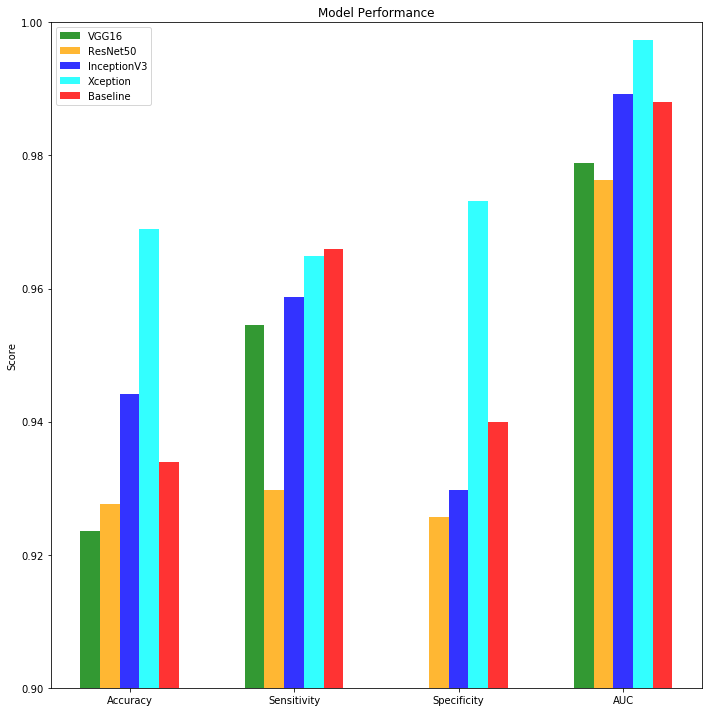

In [17]:
opacity = 0.8
error_config = {'ecolor': '0.3'}
n_groups = 4
nModels = len(modelPred.keys()) + 1

fig, ax = plt.subplots(figsize=(10, 10))
index = np.arange(n_groups)
bar_width = 0.12
colors = ['green', 'orange', 'blue', 'cyan']
for i, (model_i, c) in enumerate(zip(modelPred.keys(), colors)):
    
    xpos = index - nModels*bar_width/2 + (i+1)*bar_width
    rectsi = ax.bar(xpos, 
                    metricsDF.loc[model_i], bar_width,
                    alpha=opacity, color=c,
                    label=model_i)

xpos = index - nModels*bar_width/2 + (i+2)*bar_width
rects2 = ax.bar(xpos, reportedMetrics, bar_width,
                alpha=opacity, color='r', 
                label='Baseline')

#ax.set_xlabel('Group')
ax.set_ylabel('Score')
ax.set_title('Model Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Accuracy', 'Sensitivity', 'Specificity', 'AUC'))
ax.set_ylim([0.9, 1.0])
ax.legend()

fig.tight_layout()
plt.show()
    

In [18]:
def meanPrediction(modelPredDF, models):
    meanPred = pd.DataFrame(index=modelPredDF.index)
    yTrue = modelPredDF['yTrueTest']
    for yi in np.unique(yTrue):
        mean = modelPredDF.filter(regex='_{}'.format(yi)).mean(axis=1)
        meanPred['mean_{}'.format(yi)] = mean
    return meanPred
       

def maxPrediction(modelPredDF, models):
    maxPred = pd.DataFrame(index=modelPredDF.index)
    yTrue = modelPredDF['yTrueTest']
    for yi in np.unique(yTrue):
        maxP = modelPredDF.filter(regex='_{}'.format(yi)).max(axis=1)
        maxPred['max_{}'.format(yi)] = maxP
    maxPrednorm = maxPred.div(maxPred.sum(axis=1), axis=0)
    return maxPrednorm
        
    
def accuracyWeighted(modelPredDF, models):
    yTrue = modelPredDF['yTrueTest'].values
    zeros = np.zeros((len(yTrue), 4))
    yPredWeightedMean = pd.DataFrame(zeros,
                                     index=modelPredDF.index,
                                     columns=['0', '1', '2', '3'])   
    for model in models:
        yPredDf = modelPredDF.filter(regex='{}_'.format(model))
        classAcc = accuracy_score(yTrue,
                                  yPredDf.values.argmax(axis=1))
        for yi in np.unique(yTrue):
            yPredWeightedMean[str(yi)] = classAcc*yPredDf[model + "_{}".format(yi)] + \
                                            yPredWeightedMean[str(yi)]         
    yPredWeightedMean = yPredWeightedMean.div(yPredWeightedMean.sum(axis=1), axis=0)
    return yPredWeightedMean

def voting(modelPredDF, models):
    votingDf = pd.DataFrame(index=modelPredDF.index)
    for model in models:
        yPredDf = modelPredDF.filter(regex='{}_'.format(model))
        yPredDf.columns = [int(col[-1]) for col in yPredDf.columns]
        maxIdx = yPredDf.idxmax(axis=1).values
        votingDf[model] = yPredDf.idxmax(axis=1)
    mode = voteDf.mode(axis=1).iloc[:, 0].astype('int')
    return mode


def meanRank(modelPredDF, models):
    yTrue = modelPredDF['yTrueTest'].values
    zeros = np.zeros((len(yTrue), 4))
    rankDf = pd.DataFrame(zeros,
                          index=modelPredDF.index,
                          columns=['0', '1', '2', '3'])   
    for model in models:
        yPredDf = modelPredDF.filter(regex='{}_'.format(model))
        yPredDf.columns = [int(col[-1]) for col in yPredDf.columns]
        yPredRankDf = yPredDf.rank(axis=1, ascending=True)
        rankDf += yPredRankDf
        maxIdx = yPredDf.idxmax(axis=1).values
    return maxIdx

In [19]:
print('mean rank')
yPred = meanRank(modelPredDF, modelNames)
classAccMeanRank = accuracy_score(yTrueTest,
                                yPred)
print('\t 4 class accuracy: {0:.4g}'.format(classAccMeanRank))

yPred1Hot = to_categorical(yPred)
yPredUrgent = UrgentVRoutne(yPred1Hot, classMap).astype(np.int)
binAccMeanRank = accuracy_score(yTrueTestUrgent,
                        yPredUrgent)
tn, fp, fn, tp = confusion_matrix(yTrueTestUrgent.astype(np.float),
                                  yPredUrgent).ravel()
tprMR = tp/(tp + fn)
tnrMR = tn/(tn + fp)
print('\t bin accuracy: {0:.4g}'.format(binAccVoting))
print("\t sensitivity {0:.4g}".format(tprMR))
print("\t specificity {0:.4g}".format(tnrMR))

mean rank


NameError: name 'classAccVoting' is not defined

In [ ]:
print('majority voting')
yPred = voting(modelPredDF, modelNames)
classAccVoting = accuracy_score(yTrueTest,
                                yPred)
print('\t 4 class accuracy: {0:.4g}'.format(classAccVoting))

yPred1Hot = to_categorical(yPred)
yPredUrgent = UrgentVRoutne(yPred1Hot, classMap).astype(np.int)
binAccVoting = accuracy_score(yTrueTestUrgent,
                        yPredUrgent)
tn, fp, fn, tp = confusion_matrix(yTrueTestUrgent.astype(np.float),
                                  yPredUrgent).ravel()
tprV = tp/(tp + fn)
tnrV = tn/(tn + fp)
print('\t bin accuracy: {0:.4g}'.format(binAccVoting))
print("\t sensitivity {0:.4g}".format(tprV))
print("\t specificity {0:.4g}".format(tnrV))


In [ ]:
print('acc weighted - no InceptionV3')

modelNames_ = [m for m in modelNames if not(m=="InceptionV3")]
yPred = accuracyWeighted(modelPredDF, modelNames)
classAcc = accuracy_score(yTrueTest,
                          yPred.values.argmax(axis=1))
print('\t 4 class accuracy: {0:.3g}'.format(classAcc))
print('\t binary (urgent vs non-urgent)')
yTestPredUrgent = UrgentVRoutne(yPred.values, 
                                classMap)
scores = reportBinaryScores(yTrueTestUrgent, yTestPredUrgent, v=1)
acc, tpr, tnr, plr, nlr = scores
fprs, tprs, _ = roc_curve(yTrueTestUrgent, yTestPredUrgent)
aucUrgent = auc(fprs, tprs)
print('\t auc {0:.3g}'.format(aucUrgent))
print('\n'*3)
predLblsDF.corr()**2


In [ ]:
classAccList = [classAccMeanRank, classAccVoting]
binAccList = [binAccMeanRank, binAccVoting]
senList = [tprMR, tprV]
specList = [tnrMR, tnrV]
aucList = [0.0, 0.0]

methodsDict = {
    'mean': meanPrediction,
    'max': maxPrediction,
    'weighted mean (acc)': accuracyWeighted
}

for methodName, mergeMethod in methodsDict.items():
    print(methodName)
    yPred = mergeMethod(modelPredDF, modelNames)
    classAcc = accuracy_score(yTrueTest,
                              yPred.values.argmax(axis=1))
    print('\t 4 class accuracy: {0:.3g}'.format(classAcc))
    print('\t binary (urgent vs non-urgent)')
    yTestPredUrgent = UrgentVRoutne(yPred.values, 
                                    classMap)
    scores = reportBinaryScores(yTrueTestUrgent, yTestPredUrgent, v=1)
    acc, tpr, tnr, plr, nlr = scores
    fprs, tprs, _ = roc_curve(yTrueTestUrgent, yTestPredUrgent)
    aucUrgent = auc(fprs, tprs)
    print('\t auc {0:.3g}'.format(aucUrgent))
    print('\n'*3)
    
    classAccList.append(classAcc)
    binAccList.append(acc)
    senList.append(tpr)
    specList.append(tnr)
    aucList.append(aucUrgent)

In [ ]:
metricsDF2 = pd.DataFrame(index=['mean rank', 'voting']+list(methodsDict.keys()), 
                          columns=['4 class acc', 'bin acc', 'tpr', 'tnr', 'auc'])
metricsDF2["4 class acc"] = classAccList
metricsDF2["bin acc"] = binAccList
metricsDF2["tpr"] = senList
metricsDF2["tnr"] = specList
metricsDF2["auc"] = aucList

In [ ]:
metricsDF

In [ ]:
metricsDF2

In [ ]:
opacity = 0.8
error_config = {'ecolor': '0.3'}
n_groups = 5
nModels = len(metricsDF2.index) + 1


reportedMetrics2 = [0.0] + reportedMetrics
fig, ax = plt.subplots(figsize=(10, 10))
index = np.arange(n_groups)
bar_width = 0.10
colors = ['green', 'orange', 'blue', 'cyan', 'purple']
for i, (model_i, c) in enumerate(zip(metricsDF2.index, colors)):
    
    xpos = index - nModels*bar_width/2 + (i+1)*bar_width
    print(xpos)
    rectsi = ax.bar(xpos, 
                    metricsDF2.loc[model_i], bar_width,
                    alpha=opacity, color=c,
                    label=model_i)


xpos = index - nModels*bar_width/2 + (i+2)*bar_width
rects2 = ax.bar(xpos, reportedMetrics2, bar_width,
                alpha=opacity, color='r', 
                label='Baseline')
#ax.set_xlabel('Group')
ax.set_ylabel('Score')
ax.set_title('Model Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('4 Class Acc', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC'))
ax.set_ylim([0.9, 1.0])
ax.legend()

fig.tight_layout()
plt.show()